In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC






In [30]:
df = pd.read_excel("/content/titanic3 (3) (2).xls")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
print(df.shape)

(1309, 14)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [5]:
print(df.describe())

            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


In [6]:
print("Valeurs manquantes avant traitement :")
print(df.isnull().sum())

Valeurs manquantes avant traitement :
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [31]:
missing_percent = (df.isnull().sum() / len(df) * 100).round(2)

missing_percent = missing_percent.sort_values(ascending=False)

print("\n=== POURCENTAGE DE VALEURS MANQUANTES ===\n")
print(missing_percent)



=== POURCENTAGE DE VALEURS MANQUANTES ===

body         90.76
cabin        77.46
boat         62.87
home.dest    43.09
age          20.09
embarked      0.15
fare          0.08
sibsp         0.00
name          0.00
survived      0.00
pclass        0.00
sex           0.00
parch         0.00
ticket        0.00
dtype: float64


In [7]:
df.drop('cabin', axis=1, inplace=True)
df.drop('body', axis=1, inplace=True)
df.drop('boat', axis=1, inplace=True)

In [8]:
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df["home.dest"]=df["home.dest"].fillna("Unknown")

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   embarked   1309 non-null   object 
 10  home.dest  1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB
None


In [10]:
import numpy as np

outlier_counts = {}
num_cols_outliers = ['pclass','survived','age','sibsp','parch','fare']
for col in num_cols_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_counts[col] = count

print("\n===== NOMBRE D'OUTLIERS PAR COLONNE =====")
for col, c in outlier_counts.items():
    print(f"{col} : {c}")


===== NOMBRE D'OUTLIERS PAR COLONNE =====
pclass : 0
survived : 0
age : 101
sibsp : 57
parch : 307
fare : 171


In [11]:
def treat_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # on ramène les outliers aux bornes
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))



for col in num_cols_outliers:
    treat_outliers_iqr(df, col)

In [14]:
no_outliers = True

for col in num_cols_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR  = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    count = ((df[col] < lower) | (df[col] > upper)).sum()

    if count > 0:
        print(f"{col} ➜ {count} valeurs aberrantes restantes")
        no_outliers = False

if no_outliers:
    print("\nAUCUNE valeur aberrante restante dans les colonnes numériques !")



AUCUNE valeur aberrante restante dans les colonnes numériques !


In [12]:
df.head(30)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   embarked   1309 non-null   object 
 10  home.dest  1309 non-null   object 
dtypes: float64(6), object(5)
memory usage: 112.6+ KB


In [15]:

df = df[['survived','pclass','sex','age','sibsp','parch','fare','embarked']]

In [19]:


df['sex'] = LabelEncoder().fit_transform(df['sex'].astype(str))
df['embarked'] = LabelEncoder().fit_transform(df['embarked'].astype(str))

In [20]:
X = df.drop('survived', axis=1)
y = df['survived']



In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [35]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7560975609756098

In [36]:
dt = DecisionTreeClassifier(max_depth=5,random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7652439024390244

In [37]:
rf = RandomForestClassifier(
    n_estimators=200,      # nombre d’arbres
    random_state=42,       # pour reproductibilité
    max_depth=None,        # profondeur maximale des arbres (None = pas de limite)
    min_samples_split=2,   # nombre minimum d’échantillons pour diviser un noeud
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.801829268292683


In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Modèle SVM avec kernel RBF (souvent performant)
svm_model = SVC(kernel='rbf', C=10.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Prédiction
y_pred = svm_model.predict(X_test)


print("Accuracy :", accuracy_score(y_test, y_pred))




Accuracy : 0.7804878048780488


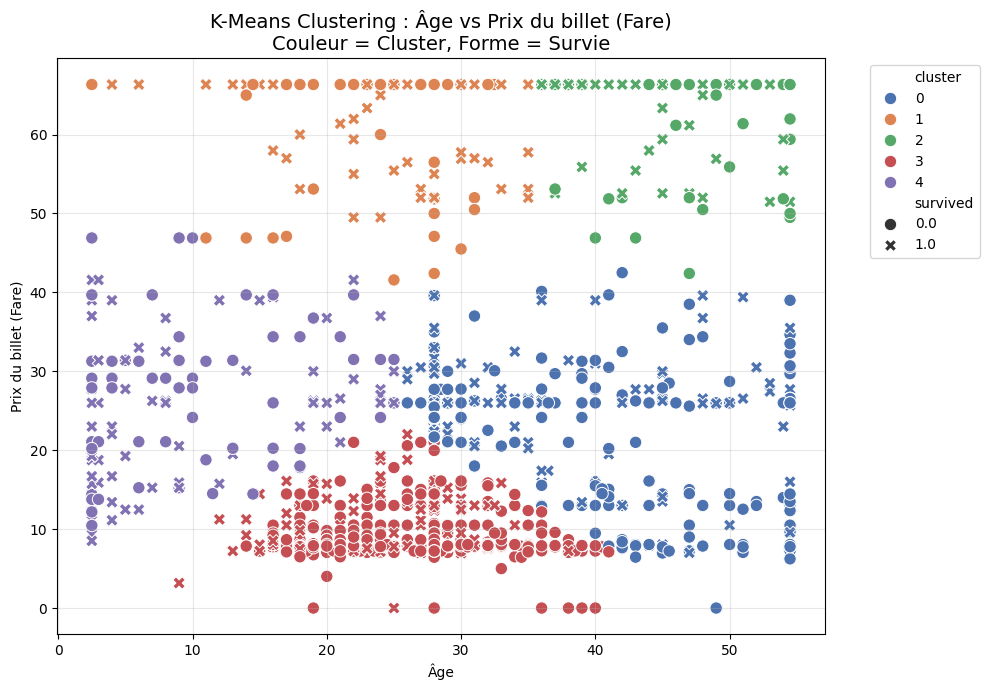

Taux de survie par cluster :
cluster
1    0.631944
2    0.616071
4    0.534351
0    0.363014
3    0.260317
Name: survived, dtype: float64


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
# 7. Appliquer K-Means sur les données complètes (pas sur X_train !)
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df)  # ← Utilise X_scaled (tout le dataset préparé)

# 8. Visualisation avec sns.scatterplot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='age', y='fare', hue='cluster', style='survived',
                palette='deep', s=80)

plt.title('K-Means Clustering : Âge vs Prix du billet (Fare)\nCouleur = Cluster, Forme = Survie', fontsize=14)
plt.xlabel('Âge')
plt.ylabel('Prix du billet (Fare)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 9. Taux de survie par cluster
print("Taux de survie par cluster :")
print(df.groupby('cluster')['survived'].mean().sort_values(ascending=False))